`<h2>Домашнее задание №7</h2>
<h3>Емельянов Виталий, 293 гр.</h3>

In [395]:
def genCorrCoef(cX, cY):
    n = cX.shape[0]
    numerator = 0.
    denom1 = 0.
    denom2 = 0.
    for j in xrange(n):
        i = 0
        while i < j:
            numerator += cX[i, j] * cY[i, j]
            denom1 += (cX[i, j])**2 
            denom2 += (cY[i, j])**2
            i += 1
    return numerator / (denom1 * denom2)**(1./2)

def pearson(X, Y):
    """Pearson correlatoin coeffient"""
    n = X.shape[0]
    cX = np.matrix(np.zeros((n, n)))
    cY = np.matrix(np.zeros((n, n)))
    for i in xrange(n):
        j = 0
        while j < i:
            cX[i, j] = X[j] - X[i]
            cX[j, i] = -cX[i, j]
            cY[i, j] = Y[j] - Y[i]
            cY[j, i] = -cY[i, j]
            j += 1
    r = genCorrCoef(cX, cY)
    return r

In [396]:
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt
%matplotlib inline


def regression(X, Y):
    """Calculate linear regression coefficients"""
    X = np.matrix(X)
    if X.shape[0] == 1:
        X = X.transpose()
    Y = np.matrix(Y).transpose()
    n = X.shape[0]
    A = np.matrix(np.column_stack((np.ones(n), X)))
    w = np.linalg.inv(A.transpose() * A) * A.transpose() * Y
    return w

def plot_regression_line(X, Y):
    """Plot 2-d line predicted by linear regression"""
    t = np.linspace(X.min(), X.max(),100)
    T = np.matrix(np.column_stack((np.ones(t.shape[0]), t)))
    w = regression(X, Y)
    print 'Coefs =', w
    _=plt.figure(figsize=(10, 7))
    _=plt.scatter(X, Y, marker='.', alpha=0.5, color='black')
    _=plt.plot(t, T * w, color='red') 
    print 'R^2 =', r(X, Y, w)

def r(x, y, w):
    """Coefficient of determination R^2"""
    X = np.matrix(np.column_stack((np.ones(x.shape[0]), x)))
    return pearson(X*w, y)

1) Построить регрессию Y=X_0 по X_1, убрав нелинейность

Coefs = [[ 1.43783453]
 [ 0.21396417]]
R^2 = 0.730858043838


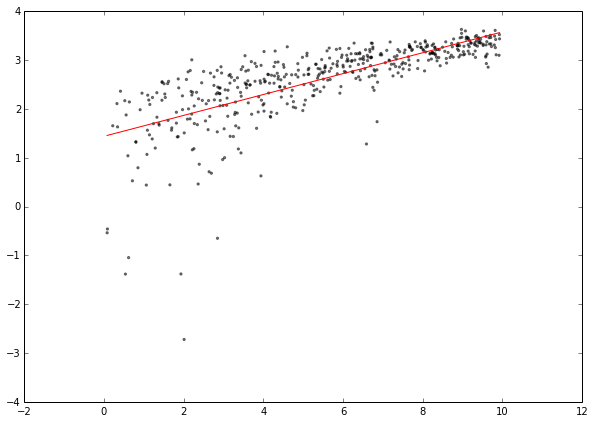

In [380]:
data = np.genfromtxt("W07_029_1.csv", delimiter=',')
data.shape
x = data[:, 1]
y = data[:, 0]
x= x[~np.isnan(y)]
y= y[~np.isnan(y)]
plot_regression_line(x, y)

X-Y график говорит о том, что неплохо было бы применить какую-нибудь трансформацию, чтобы убрать нелинейность. Форма графика подсказывает, что можно сделать следующее преобрзование:

Coefs = [[ 0.53673831]
 [-0.02589051]]
R^2 = 0.228102710818


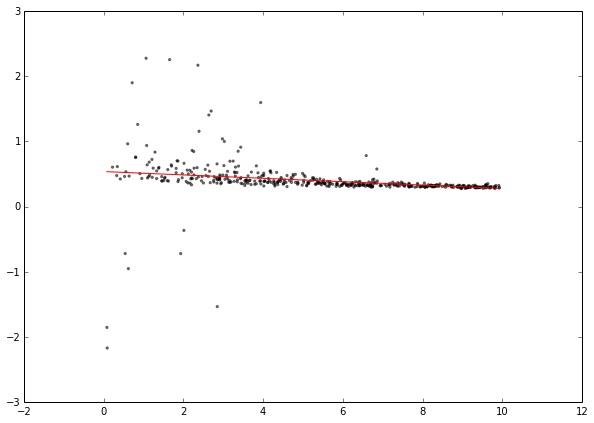

In [381]:
plot_regression_line(x, 1./ y)

Визуально стало лучше. Коэффициент детерминации R^2 говорит, что стало хуже из-за влияния выбросов.

2) Построить регрессию Y=X_0 по X_1,X_2,X_3, выяснить какие из коэффициентов являются значимыми.

In [382]:
data = np.genfromtxt("W07_029_2.csv", delimiter=',')
print data.shape
Y = data[:, 0]
X = data[:, 1:]

(500, 4)


In [383]:
print regression(X, Y)

[[ 2.78916144]
 [ 3.8641176 ]
 [ 4.71544849]
 [ 4.7345568 ]]


Видно, что значимыми являются коэффициенты при двух последних компонентах, так как они больше по модулю.

3) Построить регрессию Y=X_0 по X_1 при помощи подбора полинома и определить его степень.


In [384]:
data = np.genfromtxt("W07_029_3.csv", delimiter=',')
data.shape

(500, 2)

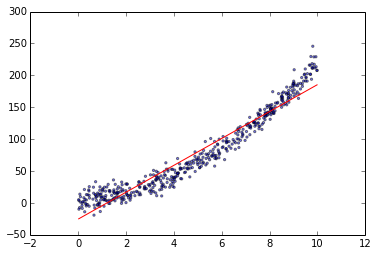

In [387]:
x = data[:, 1]
y = data[:, 0]
plt.scatter(x, y, marker = '.', alpha=0.5)
w = regression(x, y)
t = np.linspace(x.min(), x.max(),100)
T = np.matrix(np.column_stack((np.ones(t.shape[0]), t)))
_=plt.plot(t, T * w, color='red') 


Линейная функция явно не подходит. Выберем степень полинома, равную двум

[[ 4.70702034]
 [ 2.0558417 ]
 [ 1.92738834]]
0.989136757908


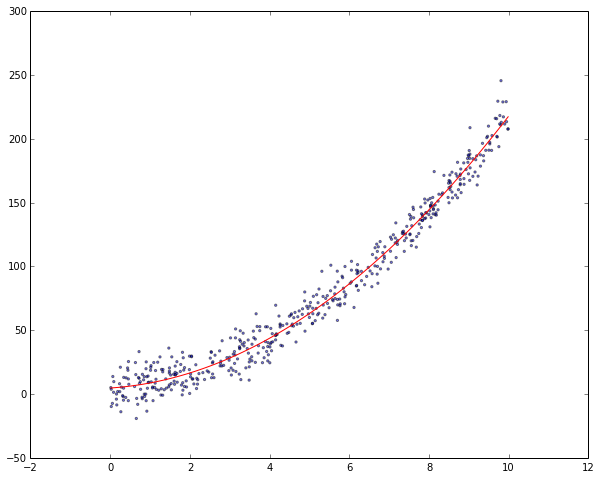

In [386]:
_=plt.figure(figsize=(10, 8))
_=plt.scatter(x, y, marker='.', alpha=0.5)
t = np.linspace(x.min(), x.max(),100)
T = np.matrix(np.column_stack((np.ones(t.shape[0]), t, t**2)))
x = np.column_stack((x, x**2))
w = regression(x, y)
print w
_=plt.plot(t, T * w, color='red') 
print r(x, y, w)

Выглядит намного лучше, коэффициент детерминации говорит о том же. Посмотрим на полином третьей степени.

[[ 3.53964625]
 [ 3.50701985]
 [ 1.55861394]
 [ 0.0248552 ]]
0.989162643617


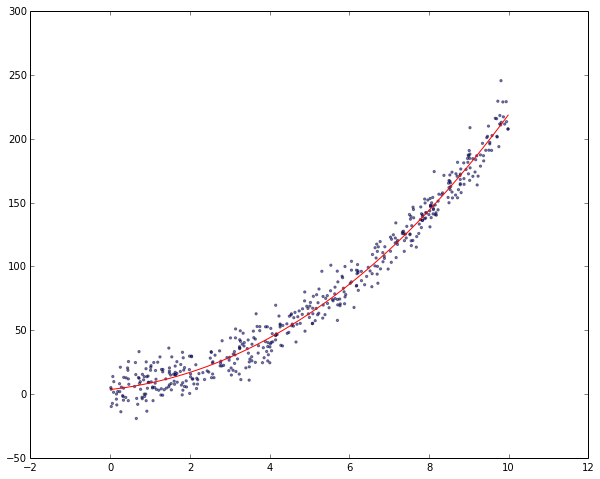

In [388]:
_=plt.figure(figsize=(10, 8))
_=plt.scatter(x, y, marker='.', alpha=0.5)
t = np.linspace(x.min(), x.max(),100)
T = np.matrix(np.column_stack((np.ones(t.shape[0]), t, t**2, t**3)))
x = np.column_stack((x, x**2, x**3))
w = regression(x, y)
print w
_=plt.plot(t, T * w, color='red')
print r(x, y, w)

Коэффициент при третьей степени занулился. Поэтому остановимся на полиноме 2-й степени.

4) Построить регрессию Y=X_0 по X_1, убрав нелинейность.


Coefs = [[ 2.00877468]
 [ 0.21647642]]
R^2 = 0.852158800928


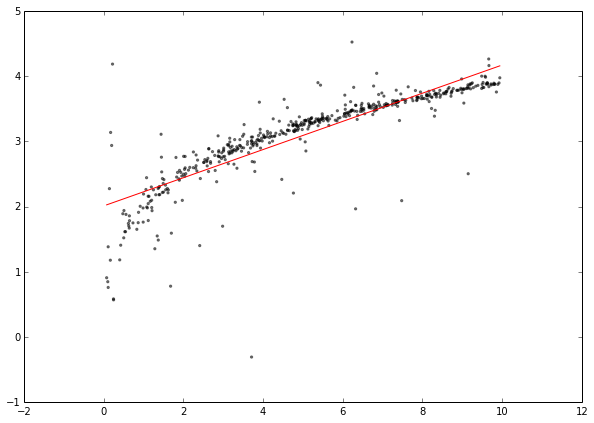

In [389]:
data = np.genfromtxt("W07_029_4.csv", delimiter=',')
y = data[:, 0]
x = data[:, 1]
x= x[~np.isnan(y)]
y= y[~np.isnan(y)]
plot_regression_line(x, y)

Сделаем преобразование по оси y

[[ 2.00877468]
 [ 0.21647642]]
Coefs = [[ 3.42066854]
 [ 4.59597121]]
R^2 = 0.899989972122


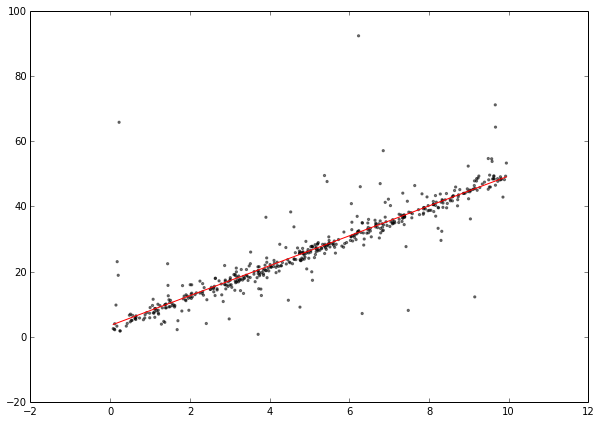

In [390]:
_=plt.figure(figsize=(10, 8))
print regression(x, y)
plot_regression_line(x, np.exp(y))

Коэффициент R^2 больше после преобразования, визуально данная модель кажется более подходящей.

5) Построить логистическую регрессию Y=X_0 по X_1, убрав нелинейность в X_1

In [391]:
import numpy as np
class LogisticRegression:
 
    def __init__(self,X,y,tolerance=1e-5):
        self.tolerance = tolerance
        self.labels = y.reshape(y.size,1)
        #create weights equal to zero with an intercept coefficent at index 0
        self.w = np.zeros((X.shape[1]+1,1))
        #Add Intercept Data Point of 1 to each row
        self.features = np.ones((X.shape[0],X.shape[1]+1))
        self.features[:,1:] = X
        self.shuffled_features = self.features
        self.shuffled_labels = self.labels
        self.likelihood_history = []
 
    def probability(self):
        """Computes the logistic probability of being a positive example"""
        return 1/(1+np.exp(-self.features.dot(self.w)))
 
    def log_likelihood(self):
        """Calculate the loglikelihood for the current set of weights and features."""
        error = self.labels-self.probability()
        product = error*self.features
        return product.sum(axis=0).reshape(self.w.shape)
 
    def log_likelihood_gradient(self):
        """Calculate the loglikelihood gradient for the current set of weights and features."""
        error = self.labels-self.probability()
        product = error*self.features
        return product.sum(axis=0).reshape(self.w.shape)

    def gradient_decent(self,alpha=1e-7,max_iterations=1e4):
        """Run the gradient decent algorithm"""
        previous_likelihood = self.log_likelihood()
        difference = self.tolerance+1
        iteration = 0
        self.likelihood_history = [previous_likelihood]
        while iteration < max_iterations:
            self.w = self.w + alpha*self.log_likelihood_gradient()
            temp = self.log_likelihood()
            difference = np.abs(temp-previous_likelihood)
            previous_likelihood = temp
            self.likelihood_history.append(previous_likelihood)
            iteration += 1

Не понял, как можно убирать здесь нелинейность. Но если сделать следующее преобразование, то есть визуальное разделение на 2 класса:

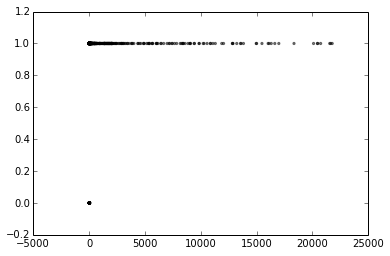

In [392]:
data = np.genfromtxt("W07_029_5.csv", delimiter=',')
y = np.ndarray(shape=(500, 1), buffer=np.array(data[:, 0]))
x = np.ndarray(shape=(500, 1), buffer=np.array(data[:, 1]))
_=plt.scatter(np.exp(x), y, color='black',alpha=0.5, marker='.')

Вычисляем веса:

In [393]:
logBTS = LogisticRegression(np.exp(x),y,tolerance=1e-6)
logBTS.gradient_decent(alpha=2e-2,max_iterations=5e4)
print "Weights =", logBTS.w.T

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: RuntimeWarning: overflow encountered in exp


Weights = [[  -837.36843     13465.49219533]]


6)Построить регрессию Y=X_0 по X_1,X_2,X_3,X_4.

In [394]:
data = np.genfromtxt("W07_029_6.csv", delimiter=',')
Y = data[:, 0]
X = data[:, 1:]
regression(X,Y)

matrix([[ 44.51687153],
        [  2.4466812 ],
        [  2.67700311],
        [  4.58507283],
        [ -1.95518373]])

Построили регрессию